In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
cd drive/MyDrive/master_thesis/pi-gan_sequential

/content/drive/.shortcut-targets-by-id/16udig9ZMaNcASs5Maj6kv7tg-TL3PnSE/Master Thesis/pi-gan_sequential


In [4]:
import os 
import numpy as np
import matplotlib.pyplot as plt

from py_files.args import *

In [5]:
def show_runs(requirements, print_vars, last=None):
    runs = sorted(os.listdir(path='saved_runs'))
    
    runs = [run for run in runs if run != "old" and run !="saved"]
    if last: 
        runs = runs[-last:]
        
    for run in runs:
        ARGS = load_args(run, print_changed=False)

        if all([requirements[key] == vars(ARGS)[key] for key in requirements.keys()]):

            print(f"\n{run}\n")

            if print_vars:
                for key in print_vars:
                    if key in vars(ARGS).keys():
                        print(f"{key}: {vars(ARGS)[key]}")
                    else: 
                        print(f"{key} not in ARGS")
            else:
                for key, item in vars(ARGS).items():
                    print(f"{key}: {item}")

            print()

            mask_losses = pcmra_losses = dice_losses = None

            if os.path.exists(f'saved_runs/{run}/mask_loss.npy'):
                mask_losses = np.load(f'saved_runs/{run}/mask_loss.npy')

            if os.path.exists(f'saved_runs/{run}/pcmra_loss.npy'):
                pcmra_losses = np.load(f'saved_runs/{run}/pcmra_loss.npy')

            if os.path.exists(f'saved_runs/{run}/dice_loss.npy'):
                dice_losses = np.load(f'saved_runs/{run}/dice_loss.npy')

            fig, axes = plt.subplots(1, 3, figsize=(18,5))
            fig.patch.set_facecolor('white')

            if type(mask_losses) == np.ndarray:
                axes[0].plot(mask_losses[1:, 0], mask_losses[1:, 1], label='Train loss')
                axes[0].plot(mask_losses[1:, 0], mask_losses[1:, 3], label='Eval loss')
                axes[0].set_title('Mask Loss')

                i1, i2 = mask_losses[:, 1].argmin(), mask_losses[:, 3].argmin()
                print(f"Lowest train mask loss at epoch {int(mask_losses[i1, 0])}:\t{round(mask_losses[i1, 1], 6)}")
                print(f"Lowest eval  mask loss at epoch {int(mask_losses[i2, 0])}:\t{round(mask_losses[i2, 3], 6)}")
                print()

            if type(pcmra_losses)  == np.ndarray:
                axes[1].plot(pcmra_losses[1:, 0], pcmra_losses[1:, 1], label='Train loss')
                axes[1].plot(pcmra_losses[1:, 0], pcmra_losses[1:, 3], label='Eval loss')
                axes[1].set_title('PCMRA Loss')
                i5, i6 = pcmra_losses[:, 1].argmin(), pcmra_losses[:, 3].argmin()
                print(f"Lowest train pcmra loss at epoch {int(pcmra_losses[i5, 0])}:\t{round(pcmra_losses[i5, 1], 6)}")
                print(f"Lowest eval  pcmra loss at epoch {int(pcmra_losses[i6, 0])}:\t{round(pcmra_losses[i6, 3], 6)}")
                print()
            if type(dice_losses) == np.ndarray:
                axes[2].plot(dice_losses[1:, 0], dice_losses[1:, 1], label='Train loss')
                axes[2].plot(dice_losses[1:, 0], dice_losses[1:, 3], label='Eval loss')
                axes[2].set_title('Dice Loss')

                i3, i4 = dice_losses[:, 1].argmin(), dice_losses[:, 3].argmin()
                print(f"Lowest train dice loss at epoch {int(dice_losses[i3, 0])}:\t{round(dice_losses[i3, 1], 6)}")
                print(f"Lowest eval  dice loss at epoch {int(dice_losses[i4, 0])}:\t{round(dice_losses[i4, 3], 6)}")


            plt.show()

            print("\n\n\n")



pi_gan_2021_07_09_10_03_38

pretrained: None
flip: False
translate: True
rotate: True
crop: True
stretch: True
first_omega_0: 300
sdf: True
mask_siren_final_activation: None
cnn_lr: 0.0001
mapping_lr: 0.0001
siren_lr: 0.0001
patience: 40

Lowest train mask loss at epoch 1150:	0.490873
Lowest eval  mask loss at epoch 1150:	0.496049

Lowest train dice loss at epoch 1350:	0.214669
Lowest eval  dice loss at epoch 1350:	0.228331


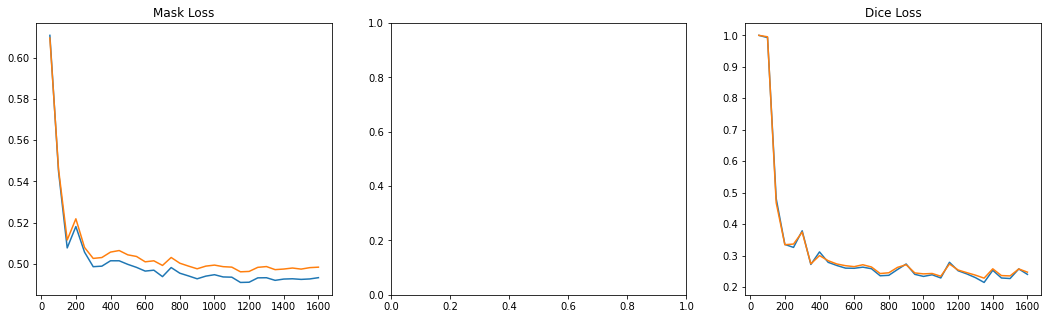






pi_gan_2021_07_09_20_12_23

pretrained: None
flip: False
translate: True
rotate: True
crop: True
stretch: True
first_omega_0: 300
sdf: True
mask_siren_final_activation: None
cnn_lr: 0.0001
mapping_lr: 0.0001
siren_lr: 0.0001
patience: 40

Lowest train mask loss at epoch 2750:	0.508801
Lowest eval  mask loss at epoch 2750:	0.514478

Lowest train dice loss at epoch 2950:	0.178487
Lowest eval  dice loss at epoch 2950:	0.209577


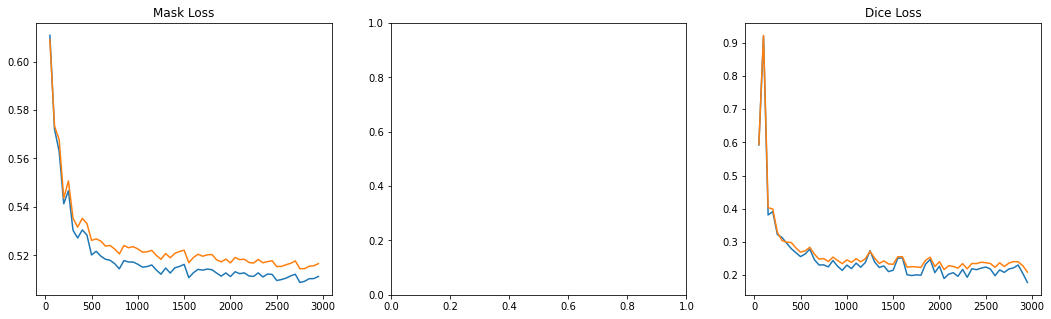

In [9]:
# requirements = {"cnn_setup": -6}
requirements = {}

# print_vars = None
print_vars = ["pretrained", "flip", "translate", "rotate", "crop", "stretch", "first_omega_0", "sdf", "mask_siren_final_activation", "cnn_lr", "mapping_lr", "siren_lr", "patience"]

show_runs(requirements, print_vars, last=None)